In [15]:
"""Importing the Dependencies"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
"""Data Collection & Analysis"""

# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

# first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(insurance_dataset.head(), "\n")

# number of rows and columns
rows, cols = insurance_dataset.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}\n")

# Getting some information about the dataset
print("Dataset Info:")
info = insurance_dataset.info()


First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

Number of rows: 1338
Number of columns: 7

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
"""Categorical Features:
- Sex
- Smoker
- Region
"""

# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
"""Data Analysis"""

# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

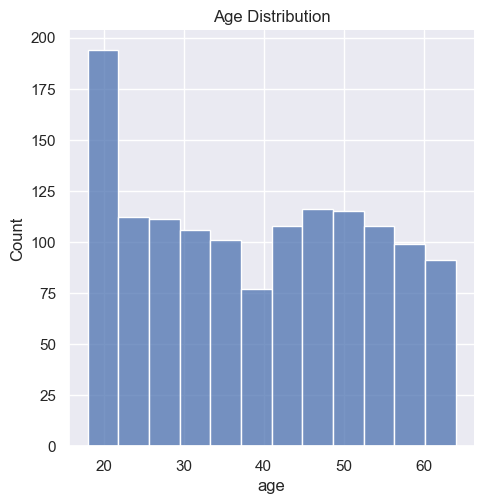

In [19]:
# distribution of age value
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

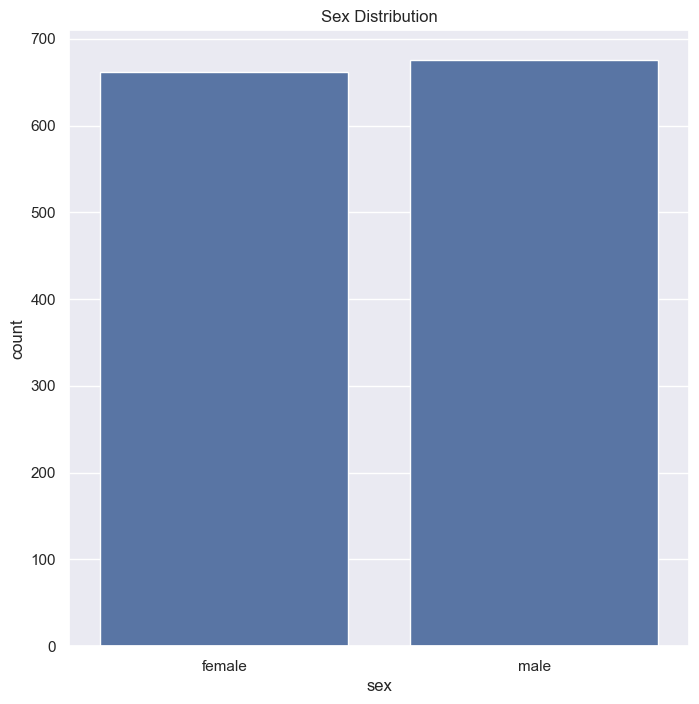

sex
male      676
female    662
Name: count, dtype: int64

In [20]:
# Gender column
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

insurance_dataset['sex'].value_counts()

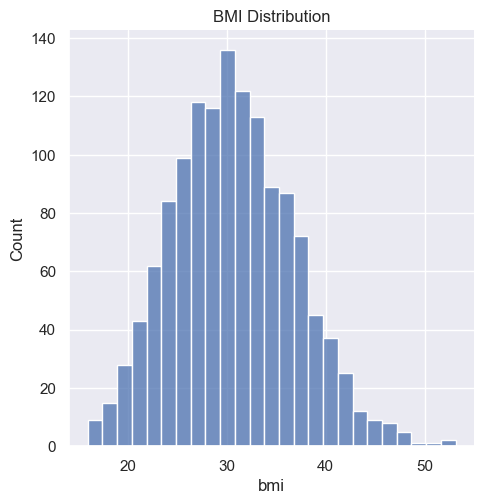

'Normal BMI Range --> 18.5 to 24.9'

In [21]:
# bmi distribution
# plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

"""Normal BMI Range --> 18.5 to 24.9"""

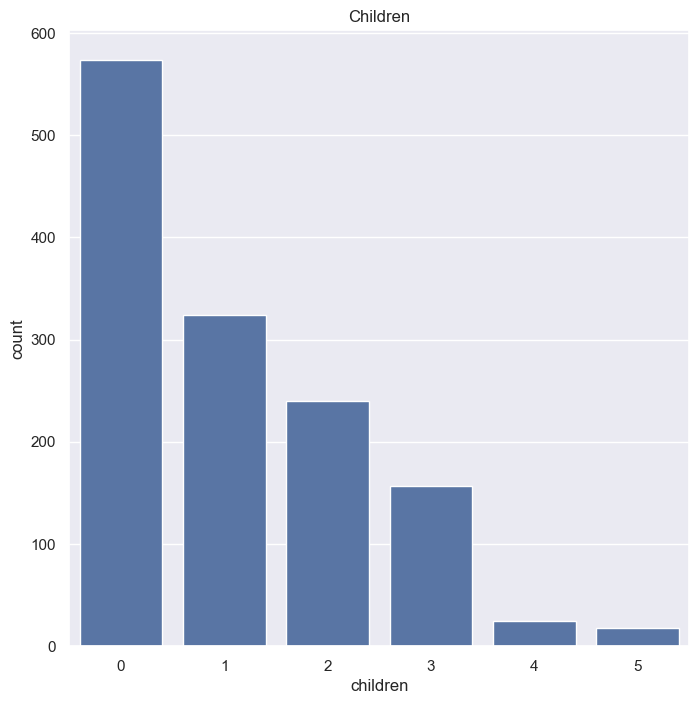

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:

# children column
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

insurance_dataset['children'].value_counts()

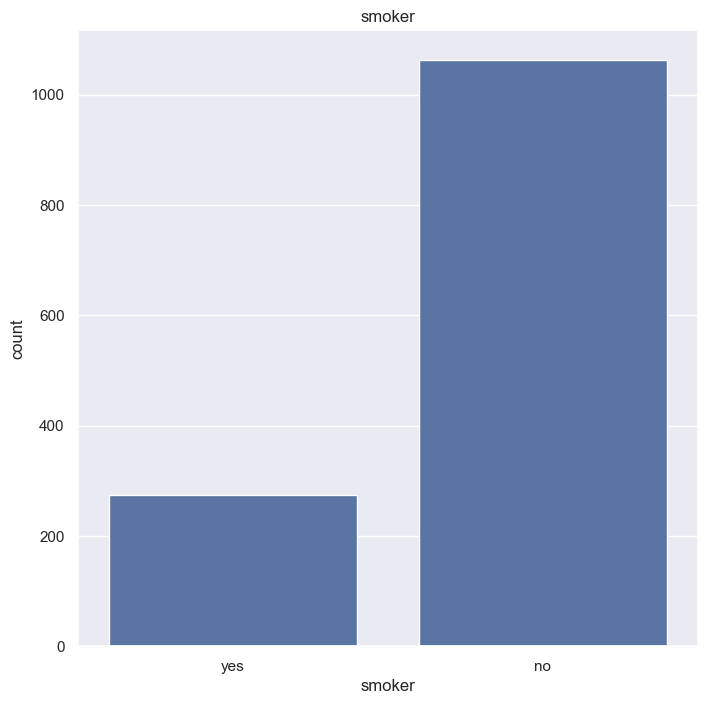

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

insurance_dataset['smoker'].value_counts()

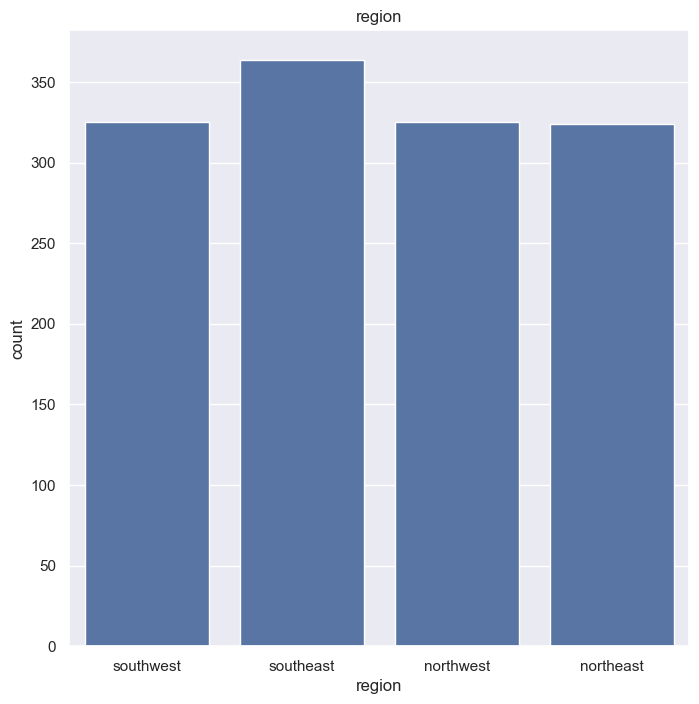

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [24]:
# region column
plt.figure(figsize=(8,8))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

insurance_dataset['region'].value_counts()

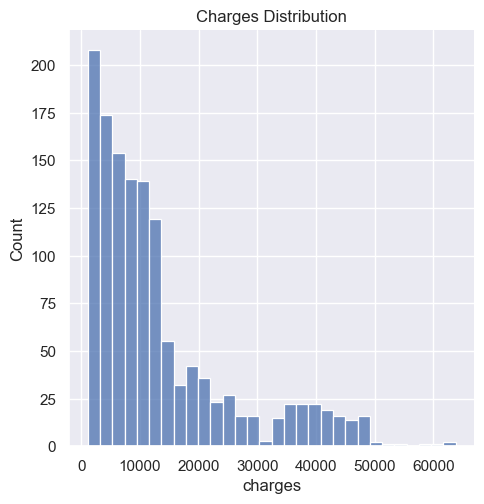

In [25]:
# distribution of charges value
# plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [26]:
"""Data Pre-Processing

Encoding the categorical features
"""

print(insurance_dataset.head())

#Encoding 'sex' column
insurance_dataset['sex'] = insurance_dataset['sex'].map({'male': 0, 'female': 1})

# Encoding 'smoker' column
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes': 0, 'no': 1})

# Encoding 'region' column
insurance_dataset['region'] = insurance_dataset['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

# Display the first 5 rows of the encoded dataset
print("Dataset after encoding:\n")
print(insurance_dataset.head())

# # encoding sex column
# insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# # encoding 'smoker' column
# insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# # encoding 'region' column
# insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
# print("Dataset after encoding:\n")
# print(insurance_dataset.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Dataset after encoding:

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520


In [27]:
"""Splitting the Features and Target"""

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

# Displaying the features (X)
print("Features (X) :\n", X, "\n")

# Displaying the target (Y)
print("Target (Y) :\n", Y)

Features (X) :
       age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns] 

Target (Y) :
 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [29]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the datasets
print("Dataset Shapes:")
print(f"Full dataset (X): {X.shape}")
print(f"Training set (X_train): {X_train.shape}")
print(f"Testing set (X_test): {X_test.shape}")

Dataset Shapes:
Full dataset (X): (1338, 6)
Training set (X_train): (1070, 6)
Testing set (X_test): (268, 6)


In [30]:
"""Model Training

Linear Regression
"""
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

"""Model Evaluation"""

# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

# prediction on test data
test_data_prediction =regressor.predict(X_test)
test_data_prediction

R squared vale :  0.751505643411174


array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


In [32]:
"""Building a Predictive System"""

# Input data as a tuple
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert input_data to a pandas DataFrame
input_data_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Use the model to predict
prediction = regressor.predict(input_data_df)

print(f'The insurance cost is:  USD {prediction[0]}')


The insurance cost is:  USD 3760.0805764960496


In [33]:
"""Prediction using Ridge regression


"""

# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, Y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(Y_test, y_pred))

0.7448008334274916


In [34]:
"""Prediction using Lasso regression"""

# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, Y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(Y_test, y_pred))

0.7447245444913575


In [35]:
"""Prediction using Random Forest Regressor

"""

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, Y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(Y_test, y_pred))

0.8372892071547597


In [36]:
# Input data as a tuple
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert input_data to a pandas DataFrame
input_data_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

prediction = RandomForestRegressor.predict(input_data_df)
# print(prediction)

print(f'The insurance cost is: USD {prediction[0]}')


The insurance cost is: USD 4366.871332600007
